# FAO Economic and Employment Stats

Two widgets for the 'People' tab.

- No of people employed full time (```forempl``` x 1000)
- ...of which are female (```femempl``` x 1000)

- Net USD generate by forest ({```usdrev``` - ```usdexp```} x 1000)
- GDP in USD in 2012 (```gdpusd2012``` x 1000) **NOTE: GDP in year=9999**

- Total Population (```totpop1000``` x 1000)



In [1]:
#Import Global Metadata etc

%run '0.Importable_Globals.ipynb'

In [353]:
# First, get the FAO data from a carto table

sql = ("SELECT fao.country, fao.forempl, fao.femempl, fao.usdrev, fao.usdexp, "
        "fao.gdpusd2012, fao.totpop1000, fao.year "
        "FROM table_7_economics_livelihood as fao "
       "WHERE fao.year = 2000 or fao.year = 2005 or fao.year = 2010 or fao.year = 9999"
        )

account = 'wri-01'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": sql}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint(r.json())

try:
    fao_data = r.json().get('rows')
except:
    fao_data = None

https://wri-01.carto.com/api/v2/sql?q=SELECT+fao.country%2C+fao.forempl%2C+fao.femempl%2C+fao.usdrev%2C+fao.usdexp%2C+fao.gdpusd2012%2C+fao.totpop1000%2C+fao.year+FROM+table_7_economics_livelihood+as+fao+WHERE+fao.year+%3D+2000+or+fao.year+%3D+2005+or+fao.year+%3D+2010+or+fao.year+%3D+9999 

{'fields': {'country': {'type': 'string'},
            'femempl': {'type': 'number'},
            'forempl': {'type': 'number'},
            'gdpusd2012': {'type': 'string'},
            'totpop1000': {'type': 'number'},
            'usdexp': {'type': 'string'},
            'usdrev': {'type': 'number'},
            'year': {'type': 'number'}},
 'rows': [{'country': 'COK',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '-9999',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'KGZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '6474843799',
         

           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'BHS',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'BIH',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 3834.364,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'BIH',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 3879.828,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'BIH',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 3845.929,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'countr

           'year': 9999},
          {'country': 'CPV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 442.426,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'CPV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 478.651,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'CPV',
           'femempl': 0.179,
           'forempl': 0.582,
           'gdpusd2012': '',
           'totpop1000': 487.601,
           'usdexp': '2221987',
           'usdrev': None,
           'year': 2010},
          {'country': 'CPV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '1827021562',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'CRI',
           'femempl': Non

          {'country': 'FRA',
           'femempl': 5.1,
           'forempl': 41.7,
           'gdpusd2012': '',
           'totpop1000': 59213.096,
           'usdexp': '386406',
           'usdrev': 0,
           'year': 2000},
          {'country': 'FRA',
           'femempl': 3.2,
           'forempl': 34.5,
           'gdpusd2012': '',
           'totpop1000': 61444.972,
           'usdexp': '630638',
           'usdrev': 0,
           'year': 2005},
          {'country': 'FRA',
           'femempl': 5.6,
           'forempl': 29.9,
           'gdpusd2012': '',
           'totpop1000': 63230.866,
           'usdexp': '644458',
           'usdrev': 0,
           'year': 2010},
          {'country': 'FRA',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '2.61E+12',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'FRO',
           'femempl': 0,
           'forempl': 0,


           'usdexp': '',
           'usdrev': 453,
           'year': 2000},
          {'country': 'HRV',
           'femempl': None,
           'forempl': 9.095,
           'gdpusd2012': '',
           'totpop1000': 4388.857,
           'usdexp': '792',
           'usdrev': 795,
           'year': 2005},
          {'country': 'HRV',
           'femempl': None,
           'forempl': 8.634,
           'gdpusd2012': '',
           'totpop1000': 4338.027,
           'usdexp': '18477',
           'usdrev': 2046,
           'year': 2010},
          {'country': 'HRV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '59228247411',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'HTI',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 8578.234,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},

           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'KWT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 1906.231,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'KWT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 2296.314,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'KWT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 2991.58,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'KWT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '1.83E+11',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
      

           'gdpusd2012': '',
           'totpop1000': 52.428,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'MHL',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '182400000',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'MKD',
           'femempl': None,
           'forempl': 3.036,
           'gdpusd2012': '',
           'totpop1000': 2052.129,
           'usdexp': '',
           'usdrev': 33862,
           'year': 2000},
          {'country': 'MKD',
           'femempl': None,
           'forempl': 2.597,
           'gdpusd2012': '',
           'totpop1000': 2090.044,
           'usdexp': '',
           'usdrev': 41336,
           'year': 2005},
          {'country': 'MKD',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 2102.216,
           'usdexp': 

           'femempl': None,
           'forempl': 4.7,
           'gdpusd2012': '',
           'totpop1000': 4624.388,
           'usdexp': '31556',
           'usdrev': None,
           'year': 2005},
          {'country': 'NOR',
           'femempl': 1.31,
           'forempl': 5.97,
           'gdpusd2012': '',
           'totpop1000': 4891.251,
           'usdexp': '48890',
           'usdrev': None,
           'year': 2010},
          {'country': 'NOR',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '5.00E+11',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'NPL',
           'femempl': None,
           'forempl': 96.1,
           'gdpusd2012': '',
           'totpop1000': 23184.177,
           'usdexp': '21725',
           'usdrev': 10324,
           'year': 2000},
          {'country': 'NPL',
           'femempl': None,
           'forempl': 105,
           'gdpus

           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 821.159,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2005},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 1749.713,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2010},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '1.92E+11',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'REU',
           'femempl': None,
           'forempl': 0.14,
           'gdpusd2012': '',
           'totpop1000': 736.091,
           'usdexp': '2764',
           'usdrev': 0,
           'year': 2000},
          {'count

          {'country': 'SPM',
           'femempl': 0,
           'forempl': 0,
           'gdpusd2012': '',
           'totpop1000': 6.138,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'SPM',
           'femempl': 0,
           'forempl': 0,
           'gdpusd2012': '',
           'totpop1000': 6.047,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'SPM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'SRB',
           'femempl': 1.1,
           'forempl': 8,
           'gdpusd2012': '',
           'totpop1000': 10272.445,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'SRB',
           'femempl': 1,
           'forempl': 6.6,
           'gdpusd2012': '',
       

          {'country': 'TUV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 9.694,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'TUV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 9.827,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'TUV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '39875708.12',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'TZA',
           'femempl': None,
           'forempl': 4,
           'gdpusd2012': '',
           'totpop1000': 34020.512,
           'usdexp': '53',
           'usdrev': 7,
           'year': 2000},
          {'country': 'TZA',
           'femempl': None,
           'forempl': 3,
           '

# Widget 1: Employment by Gender

Display a pie chart showing the number of male and female employees employed in the Forestry Sector in a given year as well as a dynamic entence.

On hover the segments of the pie chart should show the number of male or female employees as well as the % of the total.

User Variables:

- adm0 (see whitelist below, not available for all countries)
- year (2000, 2005, 2010)

### NOTE

Both widgets will use the same requests since it is easier to request all the relevent data in one go.

In [400]:
# First, get ALL data from the FAO data from a carto table

sql = ("SELECT fao.country, fao.forempl, fao.femempl, fao.usdrev, fao.usdexp, "
        "fao.gdpusd2012, fao.year "
        "FROM table_7_economics_livelihood as fao "
       "WHERE fao.year = 2000 or fao.year = 2005 or fao.year = 2010 or fao.year = 9999"
        )

account = 'wri-01'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": sql}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint(r.json())

try:
    fao_data = r.json().get('rows')
except:
    fao_data = None

https://wri-01.carto.com/api/v2/sql?q=SELECT+fao.country%2C+fao.forempl%2C+fao.femempl%2C+fao.usdrev%2C+fao.usdexp%2C+fao.gdpusd2012%2C+fao.totpop1000%2C+fao.year+FROM+table_7_economics_livelihood+as+fao+WHERE+fao.year+%3D+2000+or+fao.year+%3D+2005+or+fao.year+%3D+2010+or+fao.year+%3D+9999 

{'fields': {'country': {'type': 'string'},
            'femempl': {'type': 'number'},
            'forempl': {'type': 'number'},
            'gdpusd2012': {'type': 'string'},
            'totpop1000': {'type': 'number'},
            'usdexp': {'type': 'string'},
            'usdrev': {'type': 'number'},
            'year': {'type': 'number'}},
 'rows': [{'country': 'COK',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '-9999',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'KGZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '6474843799',
         

           'usdrev': None,
           'year': 9999},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 238.586,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 271.92,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 308.595,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'BMU',
           'fememp

           'femempl': None,
           'forempl': 5.226,
           'gdpusd2012': '',
           'totpop1000': 4320.13,
           'usdexp': '21',
           'usdrev': 14,
           'year': 2005},
          {'country': 'CRI',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 4669.685,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'CRI',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '45103963693',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'CUB',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 11138.416,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'CUB',
           'femempl': None,
           'forempl': 38.083,
           'gdpusd2012': '

           'year': 9999},
          {'country': 'FSM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 107.43,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'FSM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 106.198,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'FSM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 103.619,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'FSM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '326160960.8',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'GAB',
           'femempl': None,
      

           'totpop1000': 4388.857,
           'usdexp': '792',
           'usdrev': 795,
           'year': 2005},
          {'country': 'HRV',
           'femempl': None,
           'forempl': 8.634,
           'gdpusd2012': '',
           'totpop1000': 4338.027,
           'usdexp': '18477',
           'usdrev': 2046,
           'year': 2010},
          {'country': 'HRV',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '59228247411',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'HTI',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 8578.234,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'HTI',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 9260.879,
           'usdexp': '',
           'usdre

           'gdpusd2012': '',
           'totpop1000': 3986.865,
           'usdexp': '71563737',
           'usdrev': 1003648,
           'year': 2005},
          {'country': 'LBN',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 4341.092,
           'usdexp': '1510050',
           'usdrev': 411485581,
           'year': 2010},
          {'country': 'LBN',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '42945273632',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'LBR',
           'femempl': None,
           'forempl': 3.8,
           'gdpusd2012': '',
           'totpop1000': 2891.968,
           'usdexp': '',
           'usdrev': 21713,
           'year': 2000},
          {'country': 'LBR',
           'femempl': None,
           'forempl': 1.7,
           'gdpusd2012': '',
           'totpop1000': 3269.786,

           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'MLT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 407.529,
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'MLT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 414.747,
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'MLT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 424.738,
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'MLT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '8740973918',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
      

           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'NLD',
           'femempl': 0.11,
           'forempl': 1.46,
           'gdpusd2012': '',
           'totpop1000': 15859.863,
           'usdexp': '41970',
           'usdrev': None,
           'year': 2000},
          {'country': 'NLD',
           'femempl': 0.15,
           'forempl': 1.46,
           'gdpusd2012': '',
           'totpop1000': 16302.242,
           'usdexp': '83328',
           'usdrev': None,
           'year': 2005},
          {'country': 'NLD',
           'femempl': 0.21,
           'forempl': 1.61,
           'gdpusd2012': '',
           'totpop1000': 16615.243,
           'usdexp': '94972',
           'usdrev': None,
           'year': 2010},
          {'country': 'NLD',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '7.70E+11',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year':

           'usdrev': None,
           'year': 9999},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 593.693,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 821.159,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2005},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'totpop1000': 1749.713,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2010},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '1.92E+11',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'REU',
           'fe

           'usdexp': '1939',
           'usdrev': 3084,
           'year': 2010},
          {'country': 'SUR',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '5012121214',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'SVK',
           'femempl': None,
           'forempl': 24.8,
           'gdpusd2012': '',
           'totpop1000': 5388.01,
           'usdexp': '13600',
           'usdrev': 1393,
           'year': 2000},
          {'country': 'SVK',
           'femempl': None,
           'forempl': 23.6,
           'gdpusd2012': '',
           'totpop1000': 5391.489,
           'usdexp': '18364',
           'usdrev': 2078,
           'year': 2005},
          {'country': 'SVK',
           'femempl': 1.3,
           'forempl': 19.9,
           'gdpusd2012': '',
           'totpop1000': 5433.437,
           'usdexp': '22992',
           'usdrev': 3482,
           'year'

           'usdrev': 9994,
           'year': 2000},
          {'country': 'UZB',
           'femempl': None,
           'forempl': 6.07,
           'gdpusd2012': '',
           'totpop1000': 26044.401,
           'usdexp': '4890',
           'usdrev': 6846,
           'year': 2005},
          {'country': 'UZB',
           'femempl': 0.3,
           'forempl': 7.1,
           'gdpusd2012': '',
           'totpop1000': 27769.27,
           'usdexp': '7318',
           'usdrev': 6322,
           'year': 2010},
          {'country': 'UZB',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '51112745669',
           'totpop1000': None,
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'VAT',
           'femempl': 0,
           'forempl': 0,
           'gdpusd2012': '',
           'totpop1000': 0.787,
           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'VAT',
       

In [358]:
# Build a whitelist for this widget (not all countries have data!)

empl_whitelist = []
for d in fao_data:
    if d.get('iso') not in empl_whitelist:
        empl_whitelist.append(d.get('country'))
            
empl_whitelist[0:3]

['COK', 'KGZ', 'NAM']

In [359]:
adm0 = 'GBR'
year = 2010 #2000, 2005, 2010

In [361]:
# Retrieve data for relevent country by filtering by iso

iso_filter = list(filter(lambda x: x.get('country') == adm0, fao_data))
iso_filter

[{'country': 'GBR',
  'femempl': 1.2,
  'forempl': 15.8,
  'gdpusd2012': '',
  'totpop1000': 58951.444,
  'usdexp': '374',
  'usdrev': 188,
  'year': 2000},
 {'country': 'GBR',
  'femempl': 1.3,
  'forempl': 13.7,
  'gdpusd2012': '',
  'totpop1000': 60291.414,
  'usdexp': '496',
  'usdrev': 235,
  'year': 2005},
 {'country': 'GBR',
  'femempl': 1.8,
  'forempl': 19.8,
  'gdpusd2012': '',
  'totpop1000': 62066.35,
  'usdexp': '507',
  'usdrev': 263,
  'year': 2010},
 {'country': 'GBR',
  'femempl': None,
  'forempl': None,
  'gdpusd2012': '2.48E+12',
  'totpop1000': None,
  'usdexp': '',
  'usdrev': None,
  'year': 9999}]

In [362]:
# Sanatise data

empl_data = []
for d in iso_filter:
    if d.get('year') != 9999:
        try:
            empl_data.append({

                'male': (d.get('forempl') - d.get('femempl'))*1000,
                'female': d.get('femempl')*1000,
                'year': d.get('year')

            })
        except:
            empl_data.append({

                'male': d.get('forempl'),
                'female': None,
                'year': d.get('year')

            })        
empl_data
    

[{'female': 1200.0, 'male': 14600.000000000002, 'year': 2000},
 {'female': 1300.0, 'male': 12399.999999999998, 'year': 2005},
 {'female': 1800.0, 'male': 18000.0, 'year': 2010}]

In [363]:
# Create a list for male and female data respectively for the user selected year

for i in empl_data:
    if i.get('year') == year:
        male_data = i.get('male')
        female_data = i.get('female')


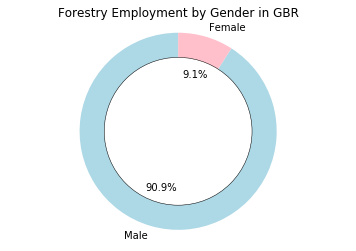

In [364]:
if female_data:
    labels = ['Male', 'Female']
    data = [male_data, female_data]
    colors = ['lightblue', 'pink']

    fig1, ax1 = plt.subplots()
    ax1.pie(data, labels=labels, autopct='%1.1f%%',
            shadow=False, startangle=90, colors=colors)
    ax1.axis('equal')
    centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=0.5)
    fig1 = plt.gcf()
    fig1.gca().add_artist(centre_circle)
    plt.title(f'Forestry Employment by Gender in {adm0}')
    plt.show()
    
else: 
    print(f'No data for {adm0} in {year}')

In [149]:
if female_data:

    print(f'In {year} there were {male_data + female_data} people employed in the Forestry Industry ', end='')
    print(f'in {iso_to_countries[adm0]}, of which {female_data} were female.', end='')
    
else:
    
    print(f'In {year} there were {male_data} people employed in the Forestry Industry ', end='')
    print(f'in {iso_to_countries[adm0]}.', end='')

In 2010 there were 512505.0 people employed in the Forestry Industry in United Kingdom, of which 89998.0 were female.

# Widget 2: Economic Impact

Displays a bar chart and ranked list (side by side) as well as a dynamic sentence.

The bar chart will display revenue and expenditure bars side-by-side, and display 'contribution relative to GDP' on hover.

The ranked list will show countries with similar contributions (and sort by net or % as described below)

User Variables:

- adm0 (see whitelist)
- year (2000, 2005, 2010)
- net contribution in USD or as a % of the country's GDP

Maths:

```
[net contribution (USD) = (revenue - expenditure)\*1000]

[net contribution (%) = 100\*(revenue - expenditure)\*1000/GDP]
```


### NOTE

Both widgets will use the same requests since it is easier to request all the relevent data in one go.

In [401]:
# First, get ALL data from the FAO data from a carto table

sql = ("SELECT fao.country, fao.forempl, fao.femempl, fao.usdrev, fao.usdexp, "
        "fao.gdpusd2012, fao.year "
        "FROM table_7_economics_livelihood as fao "
       "WHERE fao.year = 2000 or fao.year = 2005 or fao.year = 2010 or fao.year = 9999"
        )

account = 'wri-01'
urlCarto = "https://{0}.carto.com/api/v2/sql".format(account)

sql = {"q": sql}
r = requests.get(urlCarto, params=sql)
print(r.url,'\n')
pprint(r.json())

try:
    fao_data = r.json().get('rows')
except:
    fao_data = None

https://wri-01.carto.com/api/v2/sql?q=SELECT+fao.country%2C+fao.forempl%2C+fao.femempl%2C+fao.usdrev%2C+fao.usdexp%2C+fao.gdpusd2012%2C+fao.year+FROM+table_7_economics_livelihood+as+fao+WHERE+fao.year+%3D+2000+or+fao.year+%3D+2005+or+fao.year+%3D+2010+or+fao.year+%3D+9999 

{'fields': {'country': {'type': 'string'},
            'femempl': {'type': 'number'},
            'forempl': {'type': 'number'},
            'gdpusd2012': {'type': 'string'},
            'usdexp': {'type': 'string'},
            'usdrev': {'type': 'number'},
            'year': {'type': 'number'}},
 'rows': [{'country': 'COK',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '-9999',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'KGZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '6474843799',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'NAM

           'usdexp': '82605',
           'usdrev': 129418,
           'year': 2010},
          {'country': 'BLR',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '63267017440',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'BLZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '

           'year': 2010},
          {'country': 'CUB',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '71017000000',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'CYM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'CYM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2005},
          {'country': 'CYM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'CYM',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
   

           'femempl': None,
           'forempl': 20,
           'gdpusd2012': '',
           'usdexp': '5715',
           'usdrev': 371972,
           'year': 2010},
          {'country': 'GAB',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '18377083881',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'GBR',
           'femempl': 1.2,
           'forempl': 15.8,
           'gdpusd2012': '',
           'usdexp': '374',
           'usdrev': 188,
           'year': 2000},
          {'country': 'GRC',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '2.49E+11',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'GBR',
           'femempl': 1.3,
           'forempl': 13.7,
           'gdpusd2012': '',
           'usdexp': '496',
           'usdrev': 235,
           'year': 2005},
          {'country': 'GBR',
           'fem

           'year': 9999},
          {'country': 'ISL',
           'femempl': None,
           'forempl': 0.116,
           'gdpusd2012': '',
           'usdexp': '6175',
           'usdrev': 1297,
           'year': 2000},
          {'country': 'ISL',
           'femempl': None,
           'forempl': 0.149,
           'gdpusd2012': '',
           'usdexp': '13973',
           'usdrev': 2051,
           'year': 2005},
          {'country': 'ISL',
           'femempl': None,
           'forempl': 0.137,
           'gdpusd2012': '',
           'usdexp': '8613',
           'usdrev': 2247,
           'year': 2010},
          {'country': 'ISL',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '13578943167',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'ISR',
           'femempl': None,
           'forempl': 3,
           'gdpusd2012': '',
           'usdexp': '28450',
           'usdrev': None,
           

           'usdrev': 1393,
           'year': 2010},
          {'country': 'LUX',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '55143003983',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'LVA',
           'femempl': None,
           'forempl': 19,
           'gdpusd2012': '',
           'usdexp': '13883',
           'usdrev': None,
           'year': 2000},
          {'country': 'LVA',
           'femempl': 2.5,
           'forempl': 35,
           'gdpusd2012': '',
           'usdexp': '22574',
           'usdrev': None,
           'year': 2005},
          {'country': 'LVA',
           'femempl': 2.8,
           'forempl': 20.6,
           'gdpusd2012': '',
           'usdexp': '17558',
           'usdrev': 92920,
           'year': 2010},
          {'country': 'LVA',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '28372577697',
           'usdexp': '',
        

           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': 0,
           'year': 2005},
          {'country': 'NCL',
           'femempl': 0.03,
           'forempl': 0.081,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2010},
          {'country': 'NCL',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '9840000000',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'NER',
           'femempl': None,
           'forempl': 7.68,
           'gdpusd2012': '',
           'usdexp': '13644',
           'usdrev': 285,
           'year': 2000},
          {'country': 'NER',
           'femempl': None,
           'forempl': 7.68,
           'gdpusd2012': '',
           'usdexp': '7626',
           'usdrev': 1739,
           'year': 2005},
          {'country': 'NER',
           'femempl': None,
           'forempl': 14.25,
           'gdpusd2012'

           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '5',
           'usdrev': 16,
           'year': 2005},
          {'country': 'PYF',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '5',
           'usdrev': 17,
           'year': 2010},
          {'country': 'PYF',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2005},
          {'country': 'QAT',
           'femempl': None,
           'forempl': None,
           'gdpusd

           'gdpusd2012': '',
           'usdexp': '771',
           'usdrev': None,
           'year': 2010},
          {'country': 'SWZ',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '3744472287',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'SYC',
           'femempl': None,
           'forempl': 0.208,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'SYC',
           'femempl': None,
           'forempl': 0.165,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2005},
          {'country': 'SYC',
           'femempl': None,
           'forempl': 0.07,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2010},
          {'country': 'SYC',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '11287

           'forempl': 0,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2000},
          {'country': 'VAT',
           'femempl': 0,
           'forempl': 0,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2005},
          {'country': 'VAT',
           'femempl': 0,
           'forempl': 0,
           'gdpusd2012': '',
           'usdexp': '0',
           'usdrev': 0,
           'year': 2010},
          {'country': 'VAT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 9999},
          {'country': 'VCT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
           'usdexp': '',
           'usdrev': None,
           'year': 2000},
          {'country': 'VCT',
           'femempl': None,
           'forempl': None,
           'gdpusd2012': '',
    

In [275]:
#Sanitise data. Note that some revenue, expenditure, and GDP 
# values from the table may come back as None, 0 or empty strings...
#Hence we have to acount for all of these!

econ_data = []
gdp = []

#Get GDP of each country (found in element with 'year' = 9999)
for d in fao_data:
    if d.get('gdpusd2012') and d.get('gdpusd2012') != '-9999' and d.get('year') == 9999:
        gdp.append({
            
            'gdp': float(d.get('gdpusd2012')),
            'iso': d.get('country')
        })
    
#Build data structure
for d in fao_data:
    if d.get('year') != 9999:
        
        for g in gdp:
            if g.get('iso') == d.get('country'):
                tmp_gdp = g.get('gdp')
                break
        
        if d.get('usdrev') and d.get('usdrev') != '' and d.get('usdexp') and d.get('usdexp') != '':
            net = (d.get('usdrev') - int(d.get('usdexp')))*1000
            
            econ_data.append({

                'iso': d.get('country'),
                'rev': d.get('usdrev')*1000,
                'exp': int(d.get('usdexp'))*1000,
                'net_usd': net,
                'gdp': tmp_gdp,
                'net_perc': 100*net/tmp_gdp,
                'year': d.get('year')

            })
                
econ_data

[{'exp': 7673000,
  'gdp': 114000000000.0,
  'iso': 'AGO',
  'net_perc': -0.005814912280701755,
  'net_usd': -6629000,
  'rev': 1044000,
  'year': 2000},
 {'exp': 63000,
  'gdp': 114000000000.0,
  'iso': 'AGO',
  'net_perc': 4.12280701754386e-05,
  'net_usd': 47000,
  'rev': 110000,
  'year': 2005},
 {'exp': 588000,
  'gdp': 114000000000.0,
  'iso': 'AGO',
  'net_perc': -0.0004254385964912281,
  'net_usd': -485000,
  'rev': 103000,
  'year': 2010},
 {'exp': 6119000,
  'gdp': 12648095824.0,
  'iso': 'ALB',
  'net_perc': -0.041492411767167524,
  'net_usd': -5248000,
  'rev': 871000,
  'year': 2000},
 {'exp': 9587000,
  'gdp': 12648095824.0,
  'iso': 'ALB',
  'net_perc': -0.06746470076395589,
  'net_usd': -8533000,
  'rev': 1054000,
  'year': 2005},
 {'exp': 31821255000,
  'gdp': 477000000000.0,
  'iso': 'ARG',
  'net_perc': -3.727295178197065,
  'net_usd': -17779198000,
  'rev': 14042057000,
  'year': 2010},
 {'exp': 1182000,
  'gdp': 9950522733.0,
  'iso': 'ARM',
  'net_perc': -0.001859

### Get available Countries and Build Whitelist

In [347]:
# Build whitelist of countries with the data we want to analyse

econ_whitelist = []
for e in econ_data:
    if e.get('iso') not in econ_whitelist:
        econ_whitelist.append(e.get('iso'))
            
econ_whitelist[0:3]

['AGO', 'ALB', 'ARG']

# Do Ranking (*using functional python!*)

In [378]:
adm0 = 'BRA'
year = 2010 #2000, 2005, 2010

In [379]:
#Filter the data for year of interest
# NOTE: IF year equals 2010 ignore Lebanon (LBN) - mistake in data!

if year == 2010:
    in_year = list(filter(lambda x: x.get('year') == year and x.get('iso') != 'LBN', econ_data))
else:
    in_year = list(filter(lambda x: x.get('year') == year, econ_data))

in_year

[{'exp': 588000,
  'gdp': 114000000000.0,
  'iso': 'AGO',
  'net_perc': -0.0004254385964912281,
  'net_usd': -485000,
  'rev': 103000,
  'year': 2010},
 {'exp': 31821255000,
  'gdp': 477000000000.0,
  'iso': 'ARG',
  'net_perc': -3.727295178197065,
  'net_usd': -17779198000,
  'rev': 14042057000,
  'year': 2010},
 {'exp': 3024000,
  'gdp': 9950522733.0,
  'iso': 'ARM',
  'net_perc': -0.020099446568441905,
  'net_usd': -2000000,
  'rev': 1024000,
  'year': 2010},
 {'exp': 28057000,
  'gdp': 483000000000.0,
  'iso': 'BEL',
  'net_perc': 0.02043913043478261,
  'net_usd': 98721000,
  'rev': 126778000,
  'year': 2010},
 {'exp': 10756000,
  'gdp': 7557286829.0,
  'iso': 'BEN',
  'net_perc': -0.08271487031579491,
  'net_usd': -6251000,
  'rev': 4505000,
  'year': 2010},
 {'exp': 29973000,
  'gdp': 116000000000.0,
  'iso': 'BGD',
  'net_perc': -0.016744827586206896,
  'net_usd': -19424000,
  'rev': 10549000,
  'year': 2010},
 {'exp': 34770000,
  'gdp': 50972109857.0,
  'iso': 'BGR',
  'net_per

### Net Revenue in USD

In [380]:
# Order by net revenue ('net_usd')

rank_list_net = sorted(in_year, key=lambda k: k['net_usd'], reverse=True) 
rank_list_net

[{'exp': 214487000,
  'gdp': 524000000000.0,
  'iso': 'SWE',
  'net_perc': 0.7471068702290077,
  'net_usd': 3914840000,
  'rev': 4129327000,
  'year': 2010},
 {'exp': 163693000,
  'gdp': 2250000000000.0,
  'iso': 'BRA',
  'net_perc': 0.1536871111111111,
  'net_usd': 3457960000,
  'rev': 3621653000,
  'year': 2010},
 {'exp': 507204000,
  'gdp': 789000000000.0,
  'iso': 'TUR',
  'net_perc': 0.06791977186311787,
  'net_usd': 535887000,
  'rev': 1043091000,
  'year': 2010},
 {'exp': 5715000,
  'gdp': 18377083881.0,
  'iso': 'GAB',
  'net_perc': 1.9930093499691308,
  'net_usd': 366257000,
  'rev': 371972000,
  'year': 2010},
 {'exp': 243085000,
  'gdp': 247000000000.0,
  'iso': 'FIN',
  'net_perc': 0.14180445344129555,
  'net_usd': 350257000,
  'rev': 593342000,
  'year': 2010},
 {'exp': 9929000,
  'gdp': 15653921367.0,
  'iso': 'PNG',
  'net_perc': 1.6836739742133393,
  'net_usd': 263561000,
  'rev': 273490000,
  'year': 2010},
 {'exp': 46965000,
  'gdp': 381000000000.0,
  'iso': 'VEN',
  

In [381]:
# Get country's rank and print adjacent values ('net_usd' and 'iso' in this case)

rank = 1
for i in rank_list_net:
    if i.get('iso') == adm0:
        print('RANK =', rank)
        break
    else:
        rank += 1

if rank == 1:
    bottom_bound = -1
    upper_bound = 4
elif rank == 2:
    bottom_bound = 2
    upper_bound = 3    
elif rank == len(rank_list_net):
    bottom_bound = 5
    upper_bound = -1   
elif rank == len(rank_list_net)-1:
    bottom_bound = 4
    upper_bound = 0 
else:
    bottom_bound = 3
    upper_bound = 2 
    
rank_list_net[rank-bottom_bound:rank+upper_bound]

RANK = 2


[{'exp': 214487000,
  'gdp': 524000000000.0,
  'iso': 'SWE',
  'net_perc': 0.7471068702290077,
  'net_usd': 3914840000,
  'rev': 4129327000,
  'year': 2010},
 {'exp': 163693000,
  'gdp': 2250000000000.0,
  'iso': 'BRA',
  'net_perc': 0.1536871111111111,
  'net_usd': 3457960000,
  'rev': 3621653000,
  'year': 2010},
 {'exp': 507204000,
  'gdp': 789000000000.0,
  'iso': 'TUR',
  'net_perc': 0.06791977186311787,
  'net_usd': 535887000,
  'rev': 1043091000,
  'year': 2010},
 {'exp': 5715000,
  'gdp': 18377083881.0,
  'iso': 'GAB',
  'net_perc': 1.9930093499691308,
  'net_usd': 366257000,
  'rev': 371972000,
  'year': 2010},
 {'exp': 243085000,
  'gdp': 247000000000.0,
  'iso': 'FIN',
  'net_perc': 0.14180445344129555,
  'net_usd': 350257000,
  'rev': 593342000,
  'year': 2010}]

### Net Revenue as a percentage of Nations GDP

In [385]:
# Order by net revenue per GDP ('net_perc')

rank_list_perc = sorted(in_year, key=lambda k: k['net_perc'], reverse=True) 
rank_list_perc

[{'exp': 5715000,
  'gdp': 18377083881.0,
  'iso': 'GAB',
  'net_perc': 1.9930093499691308,
  'net_usd': 366257000,
  'rev': 371972000,
  'year': 2010},
 {'exp': 9929000,
  'gdp': 15653921367.0,
  'iso': 'PNG',
  'net_perc': 1.6836739742133393,
  'net_usd': 263561000,
  'rev': 273490000,
  'year': 2010},
 {'exp': 262000,
  'gdp': 471575497.3,
  'iso': 'TON',
  'net_perc': 1.0570947872698135,
  'net_usd': 4985000,
  'rev': 5247000,
  'year': 2010},
 {'exp': 214487000,
  'gdp': 524000000000.0,
  'iso': 'SWE',
  'net_perc': 0.7471068702290077,
  'net_usd': 3914840000,
  'rev': 4129327000,
  'year': 2010},
 {'exp': 17558000,
  'gdp': 28372577697.0,
  'iso': 'LVA',
  'net_perc': 0.2656156264855994,
  'net_usd': 75362000,
  'rev': 92920000,
  'year': 2010},
 {'exp': 163693000,
  'gdp': 2250000000000.0,
  'iso': 'BRA',
  'net_perc': 0.1536871111111111,
  'net_usd': 3457960000,
  'rev': 3621653000,
  'year': 2010},
 {'exp': 243085000,
  'gdp': 247000000000.0,
  'iso': 'FIN',
  'net_perc': 0.14

In [386]:
# Get country's rank and print adjacent values ('net_perc' and 'iso' in this case)

rank = 1
for i in rank_list_perc:
    if i.get('iso') == adm0:
        print('RANK =',rank)
        break
    else:
        rank += 1

if rank == 1:
    bottom_bound = -1
    upper_bound = 4
elif rank == 2:
    bottom_bound = 2
    upper_bound = 3    
elif rank == len(rank_list_perc):
    bottom_bound = 5
    upper_bound = -1   
elif rank == len(rank_list_perc)-1:
    bottom_bound = 4
    upper_bound = 0 
else:
    bottom_bound = 3
    upper_bound = 2 
    
rank_list_perc[rank-bottom_bound:rank+upper_bound]

RANK = 6


[{'exp': 214487000,
  'gdp': 524000000000.0,
  'iso': 'SWE',
  'net_perc': 0.7471068702290077,
  'net_usd': 3914840000,
  'rev': 4129327000,
  'year': 2010},
 {'exp': 17558000,
  'gdp': 28372577697.0,
  'iso': 'LVA',
  'net_perc': 0.2656156264855994,
  'net_usd': 75362000,
  'rev': 92920000,
  'year': 2010},
 {'exp': 163693000,
  'gdp': 2250000000000.0,
  'iso': 'BRA',
  'net_perc': 0.1536871111111111,
  'net_usd': 3457960000,
  'rev': 3621653000,
  'year': 2010},
 {'exp': 243085000,
  'gdp': 247000000000.0,
  'iso': 'FIN',
  'net_perc': 0.14180445344129555,
  'net_usd': 350257000,
  'rev': 593342000,
  'year': 2010},
 {'exp': 9745000,
  'gdp': 42343521966.0,
  'iso': 'LTU',
  'net_perc': 0.0997649653090267,
  'net_usd': 42244000,
  'rev': 51989000,
  'year': 2010}]

# Graph and Dynamic Sentence

In [387]:
# Get data for iso and year of interest

iso_and_year = list(filter(lambda x: x.get('year') == year and x.get('iso') == adm0, econ_data))
iso_and_year

[{'exp': 163693000,
  'gdp': 2250000000000.0,
  'iso': 'BRA',
  'net_perc': 0.1536871111111111,
  'net_usd': 3457960000,
  'rev': 3621653000,
  'year': 2010}]

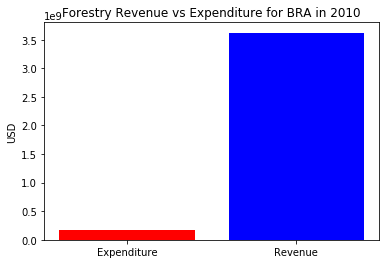

In [399]:
# Graph

bars = ['Revenue', 'Expenditure'] 
colors = ['blue','red']
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(bars, [iso_and_year[0].get('rev'), iso_and_year[0].get('exp')], color=colors)

# add some text for labels, title and axes ticks
ax.set_ylabel('USD')
ax.set_title(f'Forestry Revenue vs Expenditure for {adm0} in {year}')
plt.show()

In [395]:
# Dynamic Sentence

print(f"The forestry sector contributed a net ", end="")
print(f"{iso_and_year[0].get('net_usd')/1e9} billion USD to the economy in {year}, ", end="")
print(f"which is approximately {iso_and_year[0].get('net_perc')}% of {iso_to_countries[adm0]}'s GDP.", end="")

#The forestry sector contributed USD 95.0 billion to the economy in 2011, which is appoximately 0.6% of the GDP.

The forestry sector contributed a net 3.45796 billion USD to the economy in 2010, which is approximately 0.1536871111111111% of Brazil's GDP.